In [28]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import style
style.use('fivethirtyeight')
import datetime as dt
import time
import numpy as np
import seaborn as sns

In [29]:
# Set file paths
patient_file = "/Users/bwi/Documents/VA_Demo/100-patients/PatientCorePopulatedTable.txt"
admissions_file = "/Users/bwi/Documents/VA_Demo/100-patients/AdmissionsCorePopulatedTable.txt"
diagnoses_file = "/Users/bwi/Documents/VA_Demo/100-patients/AdmissionsDiagnosesCorePopulatedTable.txt"
labs_file = "/Users/bwi/Documents/VA_Demo/100-patients/LabsCorePopulatedTable.txt"

# Read files into Dataframes
patients = pd.read_csv(patient_file, sep="\t")
admissions = pd.read_csv(admissions_file, sep="\t")
diagnoses = pd.read_csv(diagnoses_file, sep="\t")
labs = pd.read_csv(labs_file, sep="\t")

## Inspect Data

In [30]:
patients.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,FB2ABB23-C9D0-4D09-8464-49BF0B982F0F,Male,1947-12-28 02:45:40.547,Unknown,Married,Icelandic,18.08
1,64182B95-EB72-4E2B-BE77-8050B71498CE,Male,1952-01-18 19:51:12.917,African American,Separated,English,13.03
2,DB22A4D9-7E4D-485C-916A-9CD1386507FB,Female,1970-07-25 13:04:20.717,Asian,Married,English,6.67
3,6E70D84D-C75F-477C-BC37-9177C3698C66,Male,1979-01-04 05:45:29.580,White,Married,English,16.09
4,C8556CC0-32FC-4CA5-A8CD-9CCF38816167,Female,1921-04-11 11:39:49.197,White,Married,English,18.20


In [31]:
admissions.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,2011-10-12 14:55:02.027,2011-10-22 01:16:07.557
1,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,1,1993-02-11 18:57:04.003,1993-02-24 17:22:29.713
2,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,2,2002-11-28 19:06:31.117,2002-12-04 19:14:40.797
3,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,3,2011-07-19 18:42:45.287,2011-07-25 04:57:42.053
4,886B5885-1EE2-49F3-98D5-A2F02EB8A9D4,1,1994-12-03 22:20:46.077,1994-12-20 20:24:56.010


In [32]:
diagnoses.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,2,M01.X,Direct infection of joint in infectious and pa...
1,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,3,D65,Disseminated intravascular coagulation [defibr...
2,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,4,C92.1,"Chronic myeloid leukemia, BCR/ABL-positive"
3,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,5,M05.51,Rheumatoid polyneuropathy with rheumatoid arth...
4,6A57AC0C-57F3-4C19-98A1-51135EFBC4FF,1,C91.00,Acute lymphoblastic leukemia not having achiev...


In [33]:
labs.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
2,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
3,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
4,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677


## Inspect Data though description

In [34]:
patients.describe(include= "all")

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
count,100,100,100,100,100,100,100.000000
unique,100,2,100,4,6,4,NaN
top,0BC491C5-5A45-4067-BD11-A78BEA00D3BE,Female,1955-04-07 18:55:17.077,White,Married,English,NaN
freq,1,52,1,49,45,64,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,22.102500
std,NaN,NaN,NaN,NaN,NaN,NaN,23.327656
min,NaN,NaN,NaN,NaN,NaN,NaN,1.700000
25%,NaN,NaN,NaN,NaN,NaN,NaN,12.702500
50%,NaN,NaN,NaN,NaN,NaN,NaN,15.435000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.687500


In [35]:
admissions.describe(include = "all")

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
count,372,372.000000,372,372
unique,100,NaN,372,372
top,7A025E77-7832-4F53-B9A7-09A3F98AC17E,NaN,2001-12-19 15:17:51.363,2011-01-04 09:51:53.613
freq,7,NaN,1,1
mean,NaN,2.653226,NaN,NaN
std,NaN,1.476013,NaN,NaN
min,NaN,1.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN
50%,NaN,2.000000,NaN,NaN
75%,NaN,4.000000,NaN,NaN


In [36]:
diagnoses.describe(include = "all")

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
count,372,372.000000,372,372
unique,100,NaN,349,349
top,25B786AF-0F99-478C-9CFA-0EA607E45834,NaN,Z22.31,Carrier of bacterial disease due to meningococci
freq,7,NaN,3,3
mean,NaN,2.653226,NaN,NaN
std,NaN,1.476013,NaN,NaN
min,NaN,1.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN
50%,NaN,2.000000,NaN,NaN
75%,NaN,4.000000,NaN,NaN


In [37]:
labs.describe(include = "all")

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
count,111483,111483.000000,111483,111483.000000,111483,111483
unique,100,NaN,35,NaN,14,111483
top,80D356B4-F974-441F-A5F2-F95986D119A2,NaN,CBC: NEUTROPHILS,NaN,k/cumm,1988-06-23 19:58:10.800
freq,2760,NaN,3224,NaN,22257,1
mean,NaN,2.662756,NaN,34.999722,NaN,NaN
std,NaN,1.493165,NaN,58.247715,NaN,NaN
min,NaN,1.000000,NaN,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,3.300000,NaN,NaN
50%,NaN,2.000000,NaN,10.600000,NaN,NaN
75%,NaN,4.000000,NaN,37.900000,NaN,NaN


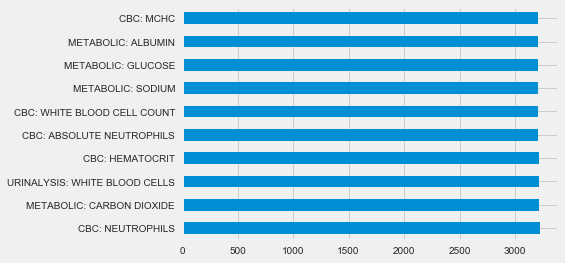

In [38]:
lab_fig = labs.LabName.value_counts()[:10].plot(kind='barh')

## Cleaning ICD10 Codes to represent categories of disease

In [39]:
# Engineering new feature: Disease Category (String)
ICDCodes = diagnoses["PrimaryDiagnosisCode"]

In [40]:
# Dictionary to hold:
#     key: 'ICD10 category'  
#     value: 'Disease Category (String)'

code_dict = {}

In [41]:
ICDCodes.head()

0     M01.X
1       D65
2     C92.1
3    M05.51
4    C91.00
Name: PrimaryDiagnosisCode, dtype: object

In [42]:
# Parse out sub ICD category
ICDCodes = pd.DataFrame([code[0:3] for code in ICDCodes])

In [43]:
ICDCodes.head()

,0
0,M01
1,D65
2,C92
3,M05
4,C91


In [44]:
# Add ICDCodes (sub-category) to diagnoses DF and evaluate
diagnoses["ICDCodes"] = ICDCodes
diagnoses.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,ICDCodes
0,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,2,M01.X,Direct infection of joint in infectious and pa...,M01
1,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,3,D65,Disseminated intravascular coagulation [defibr...,D65
2,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,4,C92.1,"Chronic myeloid leukemia, BCR/ABL-positive",C92
3,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,5,M05.51,Rheumatoid polyneuropathy with rheumatoid arth...,M05
4,6A57AC0C-57F3-4C19-98A1-51135EFBC4FF,1,C91.00,Acute lymphoblastic leukemia not having achiev...,C91


In [45]:
diagnoses.describe(include='all')

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,ICDCodes
count,372,372.000000,372,372,372
unique,100,NaN,349,349,177
top,25B786AF-0F99-478C-9CFA-0EA607E45834,NaN,Z22.31,Carrier of bacterial disease due to meningococci,M05
freq,7,NaN,3,3,23
mean,NaN,2.653226,NaN,NaN,NaN
std,NaN,1.476013,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN
50%,NaN,2.000000,NaN,NaN,NaN
75%,NaN,4.000000,NaN,NaN,NaN


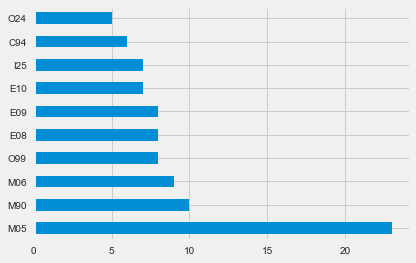

In [46]:
diagnoses_fig = diagnoses.ICDCodes.value_counts()[:10].plot(kind='barh')

## <center> Interestingly, MO5 (Rheumatoid arthritis) is the most frequent disease with 23% of the cohort being affected. </center>
## Let's look into this further...

In [48]:
# Categorize cohorts by ICDCodes 
#ICDCodes_cohorts = {}

# Create a cohort of all M05 Patients
M05_cohort_patient_ids = diagnoses.loc[(diagnoses['ICDCodes'] == 'M05'), 'PatientID'];
#M05_cohort.describe()

In [49]:
# Combine demographics with M05 cohort
M05_cohort_patients = patients[patients['PatientID'].isin(M05_cohort_patient_ids)]
#print(M05_cohort_patients)
M05_cohort_patients.describe(include='all')

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
count,21,21,21,21,21,21,21.000000
unique,21,2,21,4,5,3,NaN
top,2A5251B1-0945-47FA-A65C-7A6381562591,Male,1956-11-13 14:08:00.253,White,Married,English,NaN
freq,1,11,1,13,11,15,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,23.315238
std,NaN,NaN,NaN,NaN,NaN,NaN,22.886173
min,NaN,NaN,NaN,NaN,NaN,NaN,4.510000
25%,NaN,NaN,NaN,NaN,NaN,NaN,15.310000
50%,NaN,NaN,NaN,NaN,NaN,NaN,18.080000
75%,NaN,NaN,NaN,NaN,NaN,NaN,19.410000


In [50]:
M05_cohort_lab_results =  labs[labs['PatientID'].isin(M05_cohort_patient_ids)]
#M05_cohort_lab_results.head()
#print(M05_cohort_lab_results)
M05_cohort_lab_results.describe(include='all')

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
count,27808,27808.000000,27808,27808.000000,27808,27808
unique,21,NaN,35,NaN,14,27808
top,80D356B4-F974-441F-A5F2-F95986D119A2,NaN,URINALYSIS: SPECIFIC GRAVITY,NaN,k/cumm,2000-03-01 13:40:54.470
freq,2760,NaN,824,NaN,5508,1
mean,NaN,3.036392,NaN,35.137486,NaN,NaN
std,NaN,1.651379,NaN,58.216909,NaN,NaN
min,NaN,1.000000,NaN,0.000000,NaN,NaN
25%,NaN,2.000000,NaN,3.300000,NaN,NaN
50%,NaN,3.000000,NaN,10.600000,NaN,NaN
75%,NaN,4.000000,NaN,38.200000,NaN,NaN


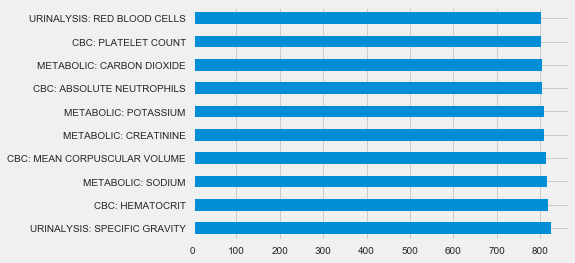

In [51]:
fig = M05_cohort_lab_results.LabName.value_counts()[:10].plot(kind='barh')

In [52]:
M05_cohort_hematocrit_results = M05_cohort_lab_results.loc[(M05_cohort_lab_results['LabName'] == 'CBC: HEMATOCRIT')]
M05_cohort_hematocrit_results.head()
#dates = [pd.to_datetime(ts) for ts in M05_cohort_lab_results['LabDateTime']]
#datenums = md.date2num(dates)

#plt.plot(dates,M05_cohort_lab_results.LabValue.LabName == 'CBC: HEMATOCRIT' )

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
9473,69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49,1,CBC: HEMATOCRIT,53.0,%,1976-02-25 13:40:25.107
9491,69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49,1,CBC: HEMATOCRIT,51.4,%,1976-02-26 15:50:29.500
9541,69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49,1,CBC: HEMATOCRIT,50.8,%,1976-02-28 01:04:49.960
9558,69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49,1,CBC: HEMATOCRIT,42.5,%,1976-02-29 11:06:20.450
9593,69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49,1,CBC: HEMATOCRIT,40.0,%,1976-02-29 19:39:43.347


/Users/bwi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


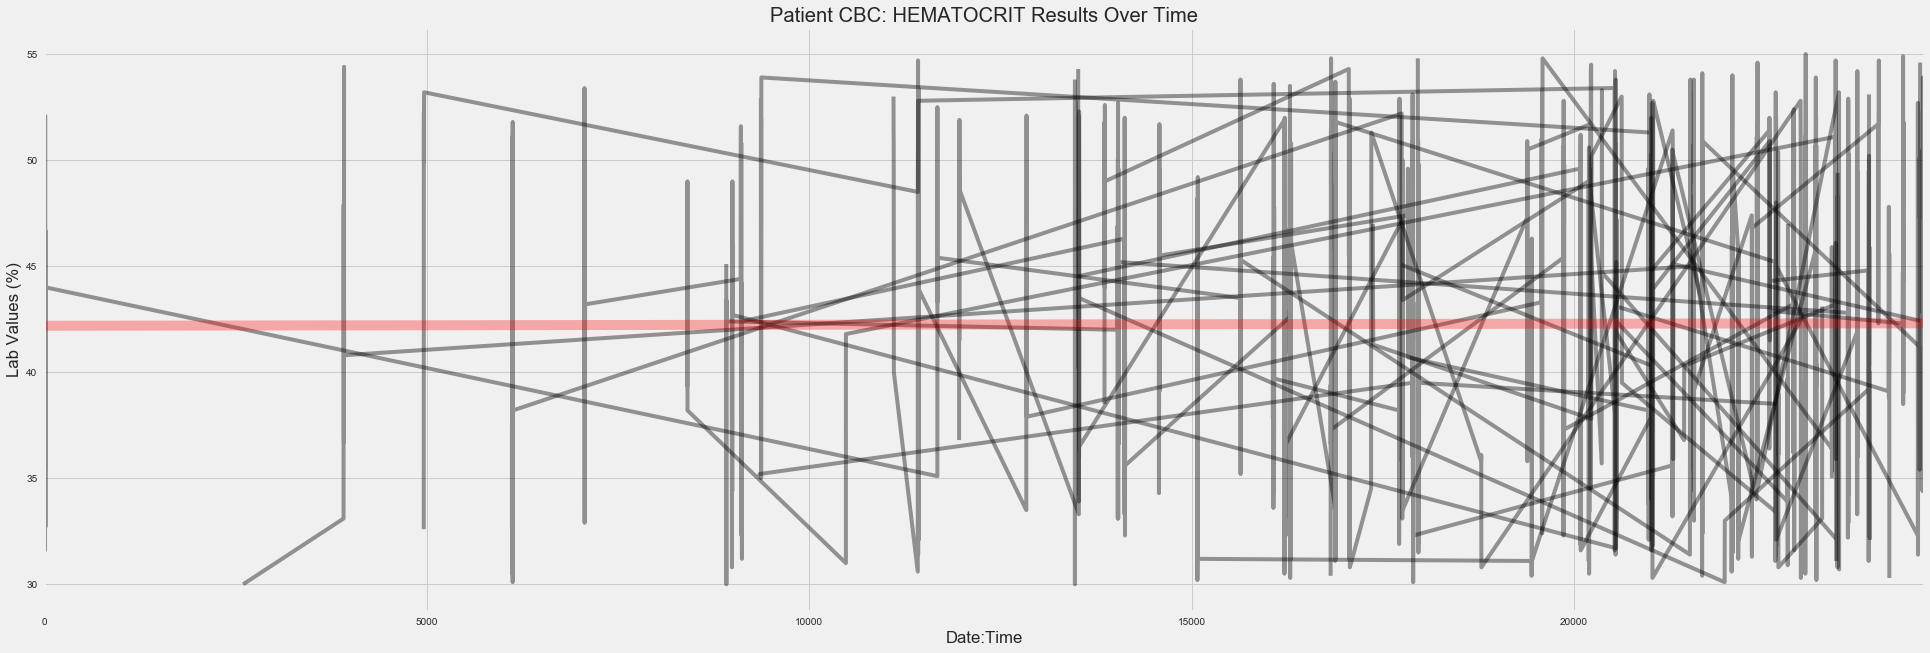

In [129]:
M05_h = M05_cohort_hematocrit_results[['PatientID', 'LabValue', 'LabDateTime']]

M05_h['TimeStamps'] = pd.to_datetime(M05_h.loc[:,'LabDateTime'])



M05_h['TimeStamps']
M05_h = M05_h[['PatientID', 'LabValue','TimeStamps']]
M05_h.head()

# Change TimeStamps to integers
M05_h['date_delta'] = (M05_h['TimeStamps'] - M05_h['TimeStamps'].min())  / np.timedelta64(1,'D')

fig, ax = plt.subplots(1,1)
x = 'date_delta'
y = 'LabValue'
M05_h.groupby('PatientID').plot(x, y, figsize=(30,10), ax=ax, alpha=0.4, color="k")
plt.legend().remove()
plt.ylabel('Lab Values (%)')
plt.xlabel('Date:Time')
plt.title('Patient CBC: HEMATOCRIT Results Over Time')


#fit = np.polyfit(x2,y2,1)
#fit_fn = np.poly1d(fit)
#plt.plot(x2,y2,'yo', x2, fit_fn(xz0), '--k', linewidth=5)
#plt.show()

from scipy.stats import linregress
def fit_line1(x, y):
    """Return slope, intercept of best fit line."""
    # Remove entries where either x or y is NaN.
    clean_data = pd.concat([x, y], 1).dropna(0) # row-wise
    (_, x), (_, y) = clean_data.iteritems()
    slope, intercept, r, p, stderr = linregress(x, y)
    return slope, intercept # could also return stderr

import statsmodels.api as sm
def fit_line2(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0] # could also return stderr in each via fit.bse


x2 = M05_h['date_delta']
y2 = M05_h['LabValue']
m, b = fit_line2(x2, y2)
N = 100 # could be just 2 if you are only drawing a straight line...
points = np.linspace(x2.min(), x2.max(), N)
plt.plot(points, m*points + b, linewidth=10, color="r", alpha=.3)







In [172]:
#M05_a = M05_h[['PatientID', 'LabValue', 'date_delta']]
#M05_a = M05_a.groupby('PatientID')
#M05_a.head()

#fig2, ax2 = plt.subplots(1,1)
#x3 = 'date_delta'
#y3 = 'LabValue'
#M05_a.groupby('PatientID').plot(x3, y3, figsize=(10,5), ax=ax2, alpha=0.4)
#plt.legend().remove()
#plt.show()

## Average Lab Value

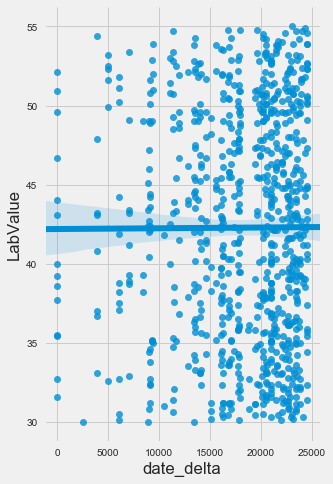

In [171]:
sns.pairplot(M05_a, x_vars=['date_delta'], y_vars='LabValue', size=7, aspect=0.7, kind='reg')

## From the box plot, it appears that Lab Values below 35 and above 50 could be considered "at risk"

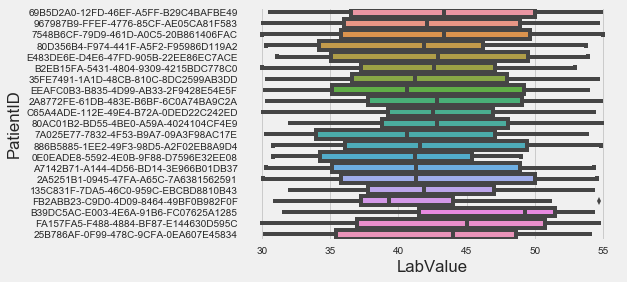

In [173]:
ax5 = sns.boxplot(x='LabValue', y='PatientID', data=M05_a)
#ax5 = sns.swarmplot(x='LabValue', y='PatientID', data=M05_a)

## At Risk M05 Patients

In [169]:
M05_h['at_risk'] = [1 if x > 50 or x < 35 else 0 for x in M05_h['LabValue'] ]
M05_h.head()
M05_h.describe(include='all')

,PatientID,LabValue,TimeStamps,date_delta,at_risk
count,818,818.000000,818,818.000000,818.000000
unique,21,NaN,818,NaN,NaN
top,80D356B4-F974-441F-A5F2-F95986D119A2,NaN,2001-07-08 05:41:37.677000,NaN,NaN
freq,88,NaN,1,NaN,NaN
first,NaN,NaN,1945-10-02 10:08:09.747000,NaN,NaN
last,NaN,NaN,2013-01-12 16:08:16.640000,NaN,NaN
mean,NaN,42.277995,NaN,18158.298266,0.394866
std,NaN,7.165018,NaN,5513.011924,0.489121
min,NaN,30.000000,NaN,0.000000,0.000000
25%,NaN,35.900000,NaN,15637.532905,0.000000


## Creating a database of each patient and their historical lab values so we can make predictions

In [156]:
#M05_a = M05_h.pivot(index='PatientID', columns='date_delta', values='LabValue')
#print(M05_a)
#M05_a.head()
#print(M05_a)
#M05_a.describe(include="all")
M05_database = []
M05_patients = []



for index, row in M05_a.iterrows():
    patientID = row['PatientID']
    if (patientID not in M05_patients):
        M05_patients.append(patientID)
        M05_database.append(
                M05_a[M05_a['PatientID'] == patientID]
        ) 
M05_db_len = len(M05_database) # Number of patients

print(M05_database)
#M05_m = M05_a[['LabValue','date_delta']]
#M05_m = M05_m.transpose()
#M05_m.head()

[                                  PatientID  LabValue    date_delta  at_risk
9473   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      53.0  11103.147400        1
9491   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      51.4  11104.237729        1
9541   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      50.8  11105.622688        1
9558   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      42.5  11107.040402        0
9593   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      40.0  11107.396917        0
9671   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      30.6  11420.334709        1
9746   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      49.3  11421.576845        0
9751   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      50.7  11423.029841        1
9785   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      54.7  11424.046625        1
9831   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      31.4  11425.139684        1
9857   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      35.3  11426.150488        0
9887   69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49      34.7  11426.800928        

In [157]:

#feature_cols = ['date_delta']
#X = M05_a[feature_cols]
#X.head()


#X.head()

## Predictions for each patient

In [165]:
#M05_database = []
#M05_patients = []
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create Linear Regression Model and 30 day lab value prediction for each patient. 
for patient in M05_database:

    feature_cols = ['date_delta']
    #X = M05_database[0][feature_cols] ORIGINAL
    X = patient[feature_cols] #CHANGE
    #y = M05_database[0]['LabValue'] ORIGINAL
    y = patient['LabValue'] # CHANGE

    # SVM Classifier
    #clf = svm.SVC()
    
    # Create Training and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # clf.fit(X_train, y_train) 

    # Linear Regression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    #X_test.apply(pd.to_numeric)
    #y_pred = clf.predict(X_test)
    y_pred = linreg.predict(X_test.apply(pd.to_numeric))

     

    #y_pred = linreg.predict(X_test)

    

    # Next Lab Value prediction 30 days from last test. 
    next_pred = linreg.predict(patient['date_delta'].iloc[-1] + 30)
    print("Patient: ", patient['PatientID'].iloc[0])# Potentially shows if LabValue is increasing or decreasing over time?
    
    # Print cooefficient for correlation
    print("Date Coefficient: ", list(zip(feature_cols, linreg.coef_)))
    
    # Print error value
    print("Error: ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
    
    #print("30 day: ", patient['date_delta'].iloc[-1] + 30, )
    print("Lab Value Prediction: ", next_pred)
    if next_pred < 35 or next_pred > 50:
        print("This patient is at risk!")
    print('\n')
    #patient.set_value('FutureLabTest',0, next_pred)
    
# Wrap everything in a function and create a list of all patient's 30 day prediction!

Patient:  69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49
Date Coefficient:  [('date_delta', -0.00013206685494149433)]
Error:  2.54707511513
Lab Value Prediction:  [ 40.42192891]


Patient:  967987B9-FFEF-4776-85CF-AE05CA81F583
Date Coefficient:  [('date_delta', 0.0002151840336276693)]
Error:  2.3327159457
Lab Value Prediction:  [ 41.90704206]


Patient:  7548B6CF-79D9-461D-A0C5-20B861406FAC
Date Coefficient:  [('date_delta', -0.00023764442512352009)]
Error:  2.71130850906
Lab Value Prediction:  [ 40.92748024]


Patient:  80D356B4-F974-441F-A5F2-F95986D119A2
Date Coefficient:  [('date_delta', 6.2635072797767122e-05)]
Error:  2.74812612222
Lab Value Prediction:  [ 41.49862836]


Patient:  E483DE6E-D4E6-47FD-905B-22EE86EC7ACE
Date Coefficient:  [('date_delta', -0.00037146129587122104)]
Error:  2.29991126751
Lab Value Prediction:  [ 40.59415678]


Patient:  B2EB15FA-5431-4804-9309-4215BDC778C0
Date Coefficient:  [('date_delta', -4.5803759035631842e-05)]
Error:  2.28366387919
Lab Value Prediction:  [

## No patients were predicted to be at risk in the next 30 days. This is probably because I used linear regression, and I could probably get a more accurate fit with a polynomial expression or another model. 

In [151]:
M05_database[0].corr()

,LabValue,date_delta,at_risk,0
LabValue,1.000000,-0.035080,0.168094,NaN
date_delta,-0.035080,1.000000,-0.222587,NaN
at_risk,0.168094,-0.222587,1.000000,NaN
0,NaN,NaN,NaN,NaN


In [114]:
#list(zip(feature_cols, linreg.coef_))

[('date_delta', -0.00013206685494149433)]

In [115]:
#y_pred = linreg.predict(X_test)

In [116]:
#from sklearn import metrics
#print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

2.54707511513


In [117]:
#print(y_pred[0:5])
#print(y_test[0:5])

[ 42.04615412  40.92650851  42.04596689  41.81685534  40.9270354 ]
9541     50.8
10470    53.3
9558     42.5
10175    46.2
10364    45.5
Name: LabValue, dtype: float64


In [121]:
next_pred = linreg.predict(M05_database[0]['date_delta'].iloc[-1] + 30)
print(next_pred)
#M05_a['FutureLabTest'] = 
# Wrap everything in a function and create a list of all patient's 30 day prediction!

[ 40.42192891]


In [457]:
M05_a.describe()

,LabValue,date_delta,at_risk
count,818.000000,818.000000,818.000000
mean,42.277995,18158.298266,0.394866
std,7.165018,5513.011924,0.489121
min,30.000000,0.000000,0.000000
25%,35.900000,15637.532905,0.000000
50%,42.300000,20198.929870,0.000000
75%,49.000000,22556.371031,1.000000
max,55.000000,24574.250080,1.000000


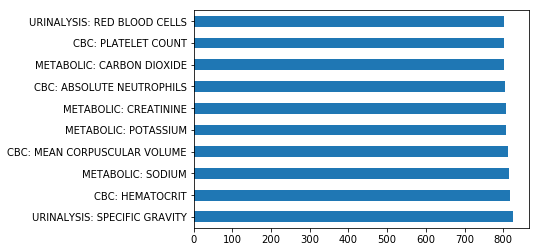

In [193]:
# Create M90 Cohort (Second most frequent disease)
M90_cohort_patient_ids = diagnoses.loc[(diagnoses['ICDCodes'] == 'M90'), 'PatientID'];

# Collect M90 Cohort Demographic Information
M90_cohort_patients = patients[patients['PatientID'].isin(M05_cohort_patient_ids)]

# Collect M90 Cohort Lab Results
M90_cohort_lab_results =  labs[labs['PatientID'].isin(M05_cohort_patient_ids)]

M90_lab_fig = M90_cohort_lab_results.LabName.value_counts()[:10].plot(kind='barh')





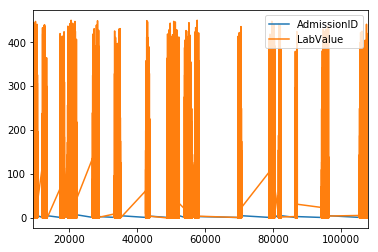

In [194]:
M90_cohort_lab_results.plot()
fig(figsize=(1,1))